# This notebook exemplifies the calculation of the reduction to Pole by using the *classical equivalent layer* approach.

In [48]:
# Import all python modules
import sys
import numpy
from matplotlib import pyplot

In [49]:
sys.path.append('codes/') 

In [50]:
# Import some developed modules
from codes import prism, sphere, grids, equivalentlayer, auxiliars, statistical, filtering

In [51]:
# Data shape
n = 50
shape = (n, n)

In [52]:
xo, yo, zo = grids.regular_grid((-2000., 2000., -2000., 2000.), shape, -200.)

In [53]:
inc = 30.
dec = 50.
incs = 2.
decs = 2.

In [54]:
#tfa = sphere_tfa(xo, yo, zo, (0., 0., 200., 150., 1.), inc, dec, incs, decs)
tfp = prism.prism_tf(xo, yo, zo, (-300., 150., -100., 280., 100., 750.), 1.25, inc, dec, incs, decs)

In [55]:
print 'Analysing total field data:'
_ = statistical.analysis(tfp)

Analysing total field data:
Minimum:    -53.4603
Maximum:    34.2189
Mean value: -0.5741
Variation:  87.6792


In [56]:
tf = auxiliars.noise_normal_dist(tfp, 2., 0.1)

#### Creating the layer

In [57]:
layer = equivalentlayer.layer((-2000., 2000., -2000., 2000.), shape, 700.)

In [58]:
mat = equivalentlayer.mat_mag_tfa(xo, yo, zo, layer, inc, dec, incs, decs)

In [59]:
T = numpy.abs(numpy.matrix.trace(mat))
print 'Trace of matrix:', T

Trace of matrix: 0.000186636351439


In [60]:
I = numpy.identity(n**2)

In [61]:
vec = numpy.linalg.solve(numpy.dot(mat.T, mat) + (0.)*I, numpy.dot(mat.T, tfp))

In [62]:
predicted = numpy.dot(mat, vec)

In [63]:
res, norm, mean, deviation = auxiliars.residual(tfp, predicted)

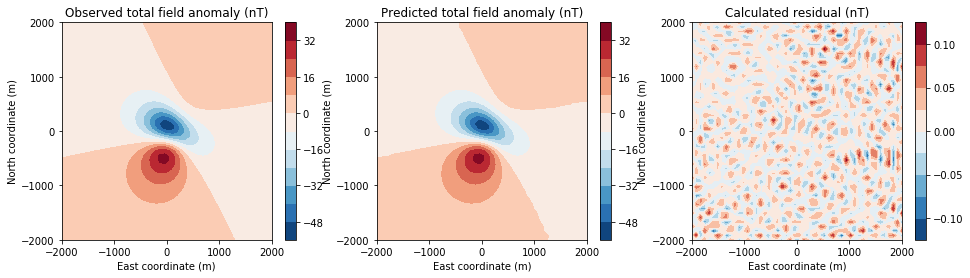

In [64]:
pyplot.figure(figsize=(16, 4))

pyplot.subplot(1, 3, 1)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), tfp.reshape(n,n), 10, cmap = pyplot.cm.RdBu_r)
pyplot.title('Observed total field anomaly (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 2)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), predicted.reshape(n,n), 10, cmap = pyplot.cm.RdBu_r)
pyplot.title('Predicted total field anomaly (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 3)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), res.reshape(n,n), 10, cmap = pyplot.cm.RdBu_r)
pyplot.title('Calculated residual (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.show()

### Applying the reduction to Pole by using Equivalent Layer

In [65]:
inc_polo = 90.
dec_polo = 0.

In [66]:
# Calculo da RTP verdadeira
#true_rtp = sphere_tfa(xo, yo, zo, (0., 0., 200., 150., 1.), inc_polo, dec_polo)
true_rtp = prism.prism_tf(xo, yo, zo, (-300., 150., -100., 280., 100., 750.), 1.5, inc_polo, dec_polo)

In [67]:
rtp = filtering.reduction(xo.reshape(n,n), yo.reshape(n,n), tfp.reshape(n,n), inc, dec, incs, decs)

In [74]:
# Calculo da RTP via camada equivalente
tf_rtp = equivalentlayer.rtp_layer((xo, yo, zo, tf), shape, layer, shape, 0.0001, inc, dec, incs, decs)

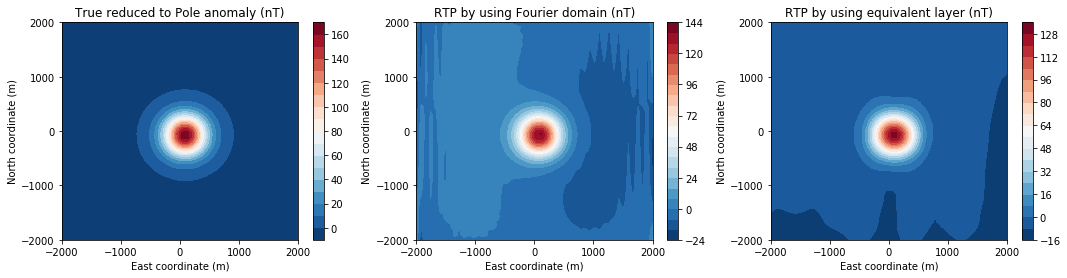

In [75]:
pyplot.figure(figsize=(18, 4))

pyplot.subplot(1, 3, 1)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), true_rtp.reshape(n,n), 20, cmap = pyplot.cm.RdBu_r)
pyplot.title('True reduced to Pole anomaly (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 2)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), rtp.reshape(n,n), 20, cmap = pyplot.cm.RdBu_r)
pyplot.title('RTP by using Fourier domain (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 3)
pyplot.contourf(yo.reshape(n,n), xo.reshape(n,n), tf_rtp.reshape(n,n), 20, cmap = pyplot.cm.RdBu_r)
pyplot.title('RTP by using equivalent layer (nT)')
pyplot.xlabel('East coordinate (m)')
pyplot.ylabel('North coordinate (m)')
pyplot.xticks(numpy.linspace(xo.min(), xo.max(), 5))
pyplot.yticks(numpy.linspace(yo.min(), yo.max(), 5))
pyplot.colorbar()

pyplot.show()